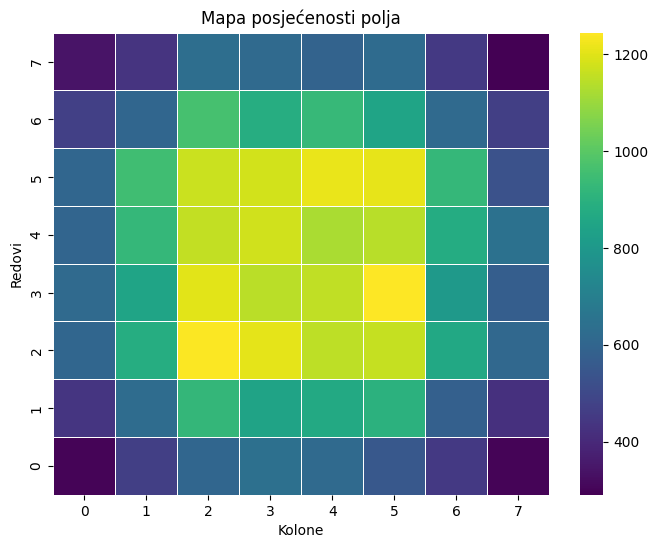

In [8]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

vel_ploce = 8
posjete = np.zeros((vel_ploce, vel_ploce))

def korak(start):
    moves = [(-1, 2), (1, 2), (2, 1), (2, -1), (1, -2), (-1, -2), (-2, -1), (-2, 1)]
    while moves:
        move = random.choice(moves)
        end = (start[0] + move[0], start[1] + move[1])
        if 1 <= end[0] <= vel_ploce and 1 <= end[1] <= vel_ploce:
            return end
        else:
            moves.remove(move)

def random_walk(start, steps=1000):
    end = start
    for _ in range(steps):
        end = korak(end)
        posjete[end[0] - 1, end[1] - 1] += 1

def srednja_duzina_setnje(start, iter=1000):
    lengths = []
    for _ in range(iter):
        lengths.append(random_walk(start))
    return sum(lengths) / len(lengths)

pocetak = (4, 4)
random_walk(pocetak, steps=50000)

plt.figure(figsize=(8, 6))
sns.heatmap(posjete, cmap="viridis", annot=False, linewidths=0.5)
plt.title("Mapa posjećenosti polja")
plt.xlabel("Kolone")
plt.ylabel("Redovi")
plt.gca().invert_yaxis()
plt.show()


In [9]:
import random
import numpy as np

vel_ploce = 8

def korak(start):
    moves = [(-1, 2), (1, 2), (2, 1), (2, -1), (1, -2), (-1, -2), (-2, -1), (-2, 1)]
    while moves:
        move = random.choice(moves)
        end = (start[0] + move[0], start[1] + move[1])
        if 1 <= end[0] <= vel_ploce and 1 <= end[1] <= vel_ploce:
            return end
        else:
            moves.remove(move)

def random_walk(start):
    i = 0
    end = start
    while end != start or i == 0:
        end = korak(end)
        i += 1
    return i

def srednja_duzina_setnje(start, iterations=1000):
    lengths = []
    for _ in range(iterations):
        lengths.append(random_walk(start))
    return sum(lengths) / len(lengths)

m = np.empty((vel_ploce, vel_ploce))
for i in range(vel_ploce):
    for j in range(vel_ploce):
        start = (i + 1, j + 1)
        m[i, j] = srednja_duzina_setnje(start)

print((336/m).astype('int'))

[[2 2 4 4 3 4 3 2]
 [2 3 5 5 5 6 4 2]
 [3 6 8 7 8 8 6 4]
 [4 5 8 7 8 7 6 4]
 [4 6 7 8 8 8 6 3]
 [4 6 8 7 8 7 5 4]
 [3 3 6 5 6 5 3 2]
 [2 3 4 3 3 4 2 1]]
